In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa.display

In [34]:
df = pd.read_csv('tracks.csv')
df

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 1:45,2008-02-06 0:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 1:45,2009-01-06 0:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106566,155316,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106567,155317,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106568,155318,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106569,155319,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [42]:
filename_1 = []
name_1 = ''

for i in df['track_id']:
    if i > 156000:
        break 
    
    folder = str(i // 1000).zfill(3)
    
    if len(str(i // 1000))==1:
        name_1 = f'fma_medium/{folder}/000{i}.mp3'
    if len(str(i // 1000))==2:
        name_1 = f'fma_medium/{folder}/0{i}.mp3'
    if len(str(i // 1000))==3:
        name_1 = f'fma_medium/{folder}/{i}.mp3'
    
    filename_1.append(name_1)

In [43]:
df.loc[:, 'filename'] = filename_1
df

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,filename
0,2,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food,fma_medium/000/0002.mp3
1,3,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave,fma_medium/000/0003.mp3
2,5,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World,fma_medium/000/0005.mp3
3,10,0,2008-11-26 1:45,2008-02-06 0:00,NaN,4,6,NaN,47632,NaN,...,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway,fma_medium/000/00010.mp3
4,20,0,2008-11-26 1:45,2009-01-06 0:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level,fma_medium/000/00020.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106566,155316,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger,fma_medium/155/155316.mp3
106567,155317,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby,fma_medium/155/155317.mp3
106568,155318,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp,fma_medium/155/155318.mp3
106569,155319,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths,fma_medium/155/155319.mp3


In [38]:
import os

def filter_existing_files(df, file_column):
    """
    Filter a dataframe to only include rows where the file exists.

    Parameters:
    df (pandas DataFrame): Input dataframe
    file_column (str): Column name containing the file paths
    root_dir (str): Root directory where files are stored

    Returns:
    pandas DataFrame: Filtered dataframe with only existing files
    """
    def file_exists(row):
        file_path = row[file_column]
        file_dir, file_name = os.path.split(file_path)
        file_dir = os.path.join(file_dir)
        return os.path.exists(os.path.join(file_dir, file_name))

    return df[df.apply(file_exists, axis=1)]

In [58]:
filter_df = filter_existing_files(df, 'filename')

In [59]:
def sample_from_each_label(df, label_column, n_samples_per_label):
    return df.groupby(label_column, group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples_per_label)))

n_samples = 400
sampled_df = sample_from_each_label(filter_df, filter_df['track_genre_top'], n_samples)

In [60]:
sampled_df['track_genre_top'].value_counts()

Classical              400
Electronic             400
Experimental           400
Folk                   400
Hip-Hop                400
Instrumental           400
International          400
Old-Time / Historic    400
Pop                    400
Rock                   400
Jazz                   346
Country                157
Soul-RnB               152
Spoken                 111
Blues                   61
Easy Listening          21
Name: track_genre_top, dtype: int64

In [63]:
genres_to_remove = ['', 'Country', 'Soul-RnB', 'Blues', 'Easy Listening','Jazz','Spoken']
sampled_df = sampled_df[~sampled_df['track_genre_top'].isin(genres_to_remove)]

In [64]:
sampled_df['track_genre_top'].value_counts()

Classical              400
Electronic             400
Experimental           400
Folk                   400
Hip-Hop                400
Instrumental           400
International          400
Old-Time / Historic    400
Pop                    400
Rock                   400
Name: track_genre_top, dtype: int64

In [65]:
sampled_df.to_csv('balance_dataset_v2.csv', index=False)

In [66]:
data = pd.read_csv('balance_dataset_v2.csv')
data

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,filename
0,70455,1,2012-09-27 16:43,NaN,NaN,7,12520,"<p>Gabriel Pavel, director Advent Choir</p>\n<...",166480,NaN,...,18638,NaN,Attribution-Share Alike 3.0 United States,12954,NaN,6,NaN,"['johann sebastian bach', 'js bach', 'choral m...",Handel - How Beautiful Are the Feet,fma_medium/070/070455.mp3
1,65792,4,2012-05-30 16:25,NaN,NaN,10,11839,<p>15 Etudes is a collection of compositions b...,297904,NaN,...,260672,NaN,Creative Commons Attribution,177562,NaN,12,NaN,['tracks to sync'],Snowing,fma_medium/065/065792.mp3
2,10035,0,2009-04-06 11:43,NaN,NaN,4,2471,NaN,105545,NaN,...,12303,en,Public Domain,10863,NaN,4,NaN,[],II. Il vecchio castello Andante,fma_medium/010/010035.mp3
3,71858,0,2012-10-25 5:00,2012-12-01 0:00,Bryan Smith,0,12728,"<p>This album, Made in Blue, was recorded in t...",40748,NaN,...,28220,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,24281,NaN,1,NaN,[],O Solitude (H. Purcell),fma_medium/071/071858.mp3
4,65674,2,2012-05-29 17:08,2012-05-29 0:00,NaN,14,11823,<p>This is a new recording of J.S. Bach’s Gold...,109165,Anne-Marie Sylvestre,...,4404,NaN,CC0 1.0 Universal,3310,NaN,9,NaN,"['johann sebastian bach', 'bach', 'tracks to s...",Variatio 8 a 2 Clav.,fma_medium/065/065674.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,105144,0,2014-05-10 9:07,2014-05-10 0:00,NaN,0,16446,<p>Detritus is an industrial metal EP by Portu...,15563,NaN,...,4267,NaN,Attribution-NonCommercial-ShareAlike 3.0 Inter...,3468,NaN,4,NaN,[],I Sing the Body Electric (remixed by Torsion),fma_medium/105/105144.mp3
3996,75234,0,2013-01-04 13:09,2004-11-10 0:00,NaN,0,13234,<p>Progressive heavy metal with elements drawn...,12142,NaN,...,1882,NaN,Attribution-NonCommercial-ShareAlike 3.0 Inter...,718,NaN,6,NaN,"['orchestral metal', 'metal']",The Hundredth Name,fma_medium/075/075234.mp3
3997,148896,0,2017-01-04 17:07,2016-04-16 0:00,NaN,0,22186,<p>A live performance from Glenn Morrow's Cry ...,1516,Monty Hall,...,680,NaN,Creative Commons Attribution-NonCommercial-NoD...,539,NaN,1,NaN,[],Let The Kid Come Out,fma_medium/148/148896.mp3
3998,64648,0,2012-05-10 16:08,2012-05-10 0:00,Zeke Mishanec,0,11652,<p><span>From the town that brought you 9 Shoc...,5408,Reed Dunlea,...,606,NaN,Attribution-Noncommercial-No Derivative Works ...,409,NaN,15,NaN,[],Poison in the Kitchen,fma_medium/064/064648.mp3


In [67]:
features = ['filename','track_genre_top']
new = data[features]
new

,filename,track_genre_top
0,fma_medium/070/070455.mp3,Classical
1,fma_medium/065/065792.mp3,Classical
2,fma_medium/010/010035.mp3,Classical
3,fma_medium/071/071858.mp3,Classical
4,fma_medium/065/065674.mp3,Classical
...,...,...
3995,fma_medium/105/105144.mp3,Rock
3996,fma_medium/075/075234.mp3,Rock
3997,fma_medium/148/148896.mp3,Rock
3998,fma_medium/064/064648.mp3,Rock


In [6]:
def y_sr_zipfile(filename):
    import zipfile as zf
    import soundfile as sf
    import io

    with zf.ZipFile('fma_medium.zip') as myzip:
        with myzip.open(filename) as myfile:
            tmp = io.BytesIO(myfile.read())
            y, sr = librosa.load(tmp) 
    
    return y, sr

In [7]:
#y, sr = y_sr_zipfile(data['filename'][1])

In [8]:
def libROSA_features(y, sr):
    
    import librosa
    
    chroma_stft_mean = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    chroma_stft_var = librosa.feature.chroma_stft(y=y, sr=sr).var()
    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()
    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var = librosa.feature.spectral_centroid(y=y, sr=sr).var()
    spectral_bandwidth_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwidth_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()
    spectral_flatness_mean = librosa.feature.spectral_flatness(y=y).mean()
    spectral_flatness_var = librosa.feature.spectral_flatness(y=y).var()
    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y, sr=sr).var()
    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y).var()
    harmony_mean = librosa.effects.harmonic(y).mean()
    harmony_var = librosa.effects.harmonic(y).var()
    perceptr_mean = librosa.feature.melspectrogram(y=y, sr=sr).mean()
    perceptr_var = librosa.feature.melspectrogram(y=y, sr=sr).var()
    tempo = librosa.feature.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr).item()
    mfcc1_mean = librosa.feature.mfcc(y=y, sr=sr)[0].mean()
    mfcc1_var = librosa.feature.mfcc(y=y, sr=sr)[0].var()
    mfcc2_mean = librosa.feature.mfcc(y=y, sr=sr)[1].mean()
    mfcc2_var = librosa.feature.mfcc(y=y, sr=sr)[1].var()
    mfcc3_mean = librosa.feature.mfcc(y=y, sr=sr)[2].mean()
    mfcc3_var = librosa.feature.mfcc(y=y, sr=sr)[2].var()
    mfcc4_mean = librosa.feature.mfcc(y=y, sr=sr)[3].mean()
    mfcc4_var = librosa.feature.mfcc(y=y, sr=sr)[3].var()
    mfcc5_mean = librosa.feature.mfcc(y=y, sr=sr)[4].mean()
    mfcc5_var = librosa.feature.mfcc(y=y, sr=sr)[4].var()
    mfcc6_mean = librosa.feature.mfcc(y=y, sr=sr)[5].mean()
    mfcc6_var = librosa.feature.mfcc(y=y, sr=sr)[5].var()
    mfcc7_mean = librosa.feature.mfcc(y=y, sr=sr)[6].mean()
    mfcc7_var = librosa.feature.mfcc(y=y, sr=sr)[6].var()
    mfcc8_mean = librosa.feature.mfcc(y=y, sr=sr)[7].mean()
    mfcc8_var = librosa.feature.mfcc(y=y, sr=sr)[7].var()
    mfcc9_mean = librosa.feature.mfcc(y=y, sr=sr)[8].mean()
    mfcc9_var = librosa.feature.mfcc(y=y, sr=sr)[8].var()
    mfcc10_mean = librosa.feature.mfcc(y=y, sr=sr)[9].mean()
    mfcc10_var = librosa.feature.mfcc(y=y, sr=sr)[9].var()
    mfcc11_mean = librosa.feature.mfcc(y=y, sr=sr)[10].mean()
    mfcc11_var = librosa.feature.mfcc(y=y, sr=sr)[10].var()
    mfcc12_mean = librosa.feature.mfcc(y=y, sr=sr)[11].mean()
    mfcc12_var = librosa.feature.mfcc(y=y, sr=sr)[11].var()
    mfcc13_mean = librosa.feature.mfcc(y=y, sr=sr)[12].mean()
    mfcc13_var = librosa.feature.mfcc(y=y, sr=sr)[12].var()
    mfcc14_mean = librosa.feature.mfcc(y=y, sr=sr)[13].mean()
    mfcc14_var = librosa.feature.mfcc(y=y, sr=sr)[13].var()
    mfcc15_mean = librosa.feature.mfcc(y=y, sr=sr)[14].mean()
    mfcc15_var = librosa.feature.mfcc(y=y, sr=sr)[14].var()
    mfcc16_mean = librosa.feature.mfcc(y=y, sr=sr)[15].mean()
    mfcc16_var = librosa.feature.mfcc(y=y, sr=sr)[15].var()
    mfcc17_mean = librosa.feature.mfcc(y=y, sr=sr)[16].mean()
    mfcc17_var = librosa.feature.mfcc(y=y, sr=sr)[16].var()
    mfcc18_mean = librosa.feature.mfcc(y=y, sr=sr)[17].mean()
    mfcc18_var = librosa.feature.mfcc(y=y, sr=sr)[17].var()
    mfcc19_mean = librosa.feature.mfcc(y=y, sr=sr)[18].mean()
    mfcc19_var = librosa.feature.mfcc(y=y, sr=sr)[18].var()
    mfcc20_mean = librosa.feature.mfcc(y=y, sr=sr)[19].mean()
    mfcc20_var = librosa.feature.mfcc(y=y, sr=sr)[19].var()
    
    info = [chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,
            spectral_bandwidth_mean,spectral_bandwidth_var,spectral_flatness_mean,spectral_flatness_var,
            rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,
            perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,
            mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,
            mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,
            mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var]
    
    return info

In [9]:
#libROSA_features(y, sr)

In [10]:
def extract_features(row):
    filename = row['filename']
    try:
        y, sr = librosa.load(filename)
        features = libROSA_features(y, sr)
    except FileNotFoundError:
        features = [None] * 40  # 40 is the number of features extracted by libROSA_features
    return pd.Series(features)

df_features = new.apply(extract_features, axis=1)

new = pd.concat([new, df_features], axis=1)

C:\Users\INGRID GUEVARA\AppData\Local\Temp\ipykernel_2492\3153071641.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename)
C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [11]:
new.to_csv('audio_features.csv', index=False)

In [ ]:
def extract_features(row):
    filename = row['filename']
    y, sr = librosa.load(filename)
    #y, sr = y_sr_zipfile(filename)
    features = libROSA_features(y, sr)
    return pd.Series(features)

df_features_2 = new.apply(extract_features, axis=1)

new_test = pd.concat([new, df_features], axis=1)

new_test.to_csv('audio_features_new_test.csv', index=False)

Blue


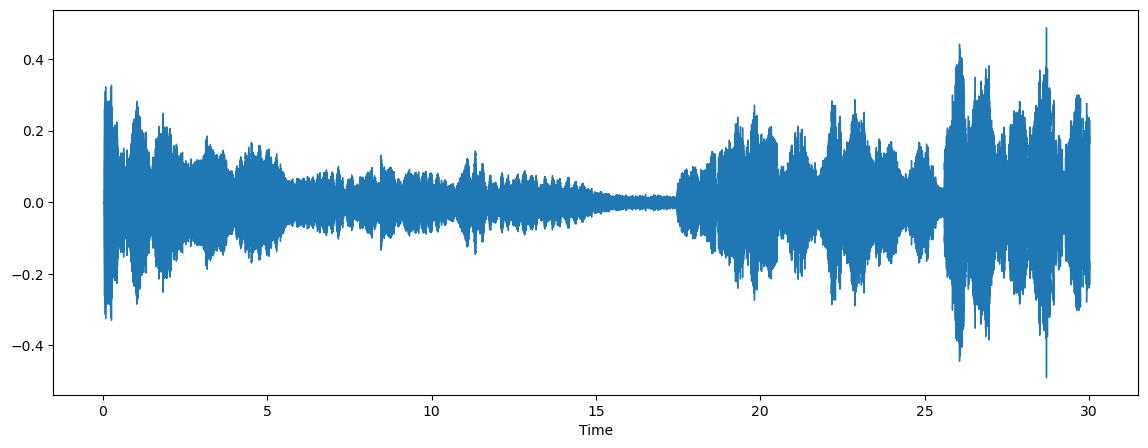

In [16]:
y, sr = librosa.load(data['filename'][1])
plt.figure(figsize=(14, 5)) 
librosa.display.waveshow(y, sr=sr)  
print("Blue")

In [17]:
music_data = pd.read_csv('features_30_sec.csv') 
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [18]:
music_data[['rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo']]

,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
0,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875
1,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589
2,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023
3,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009
4,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178
...,...,...,...,...,...,...,...,...,...
995,4253.557033,1.222421e+06,0.089227,0.001305,1.926835e-06,0.004594,-0.000012,0.000681,103.359375
996,4149.338328,1.046621e+06,0.097664,0.000868,-1.406142e-06,0.003981,-0.000012,0.000818,117.453835
997,4031.405321,8.042154e+05,0.121823,0.001697,-4.881450e-07,0.003825,-0.000014,0.001124,129.199219
998,3015.631004,1.332712e+06,0.048724,0.000808,7.986756e-07,0.006077,-0.000013,0.000653,73.828125


In [19]:
music_data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [20]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [21]:
music_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Blue


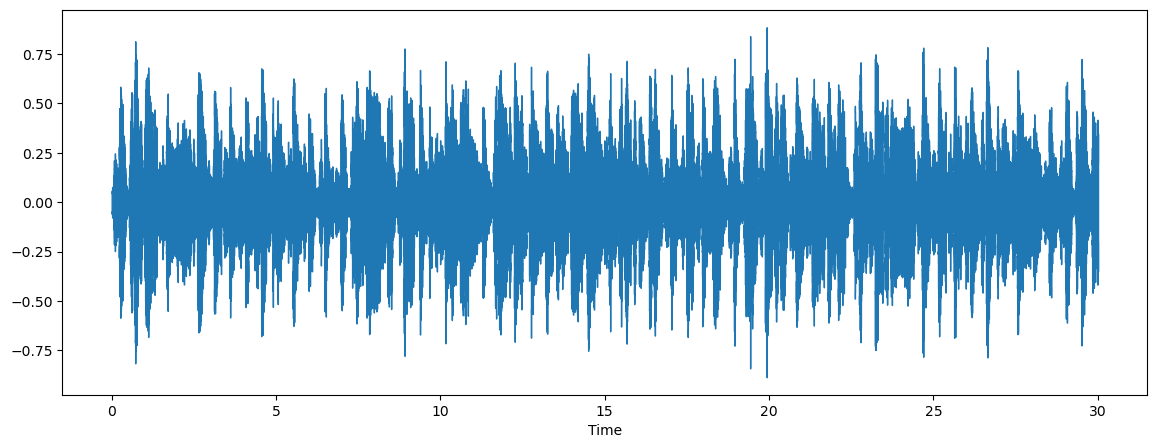

In [22]:
path = 'C:\\Users\\INGRID GUEVARA\\OneDrive\\Escritorio\\College\\3 Semester\\AIML 3604 Project ML & AI\\GTZAN\\genres_original\\blues\\blues.00000.wav'
plt.figure(figsize=(14, 5)) 
y, sr = librosa.load(path) 
librosa.display.waveshow(y, sr=sr)  
print("Blue")

In [23]:
librosa.get_duration(y=y, sr=sr)

30.013333333333332

In [24]:
librosa.feature.chroma_stft(y=y, sr=sr).mean()

0.3501285

In [25]:
librosa.feature.rms(y=y).mean()

0.13018432

In [26]:
librosa.feature.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr).item()

123.046875

In [27]:
librosa.effects.harmonic(y).mean()

-4.90663e-05

In [28]:
librosa.feature.melspectrogram(y=y, sr=sr).mean()

4.4255424

In [29]:
librosa.feature.melspectrogram(y=y, sr=sr).mean()

4.4255424

In [30]:
librosa.feature.mfcc(y=y, sr=sr)[17].mean()

-0.40872997

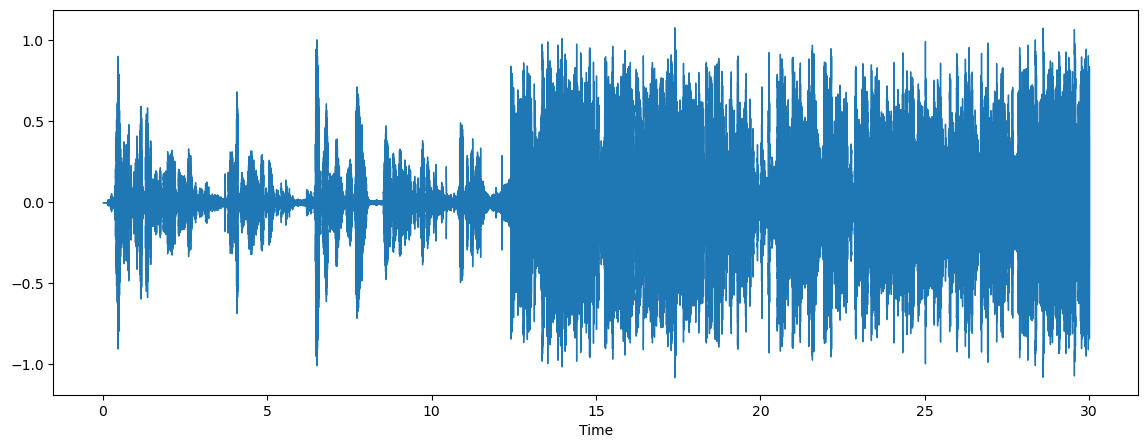

In [31]:
path = 'test.wav'
plt.figure(figsize=(14, 5)) 
y, sr = librosa.load(path, duration=30) 
librosa.display.waveshow(y, sr=sr)  

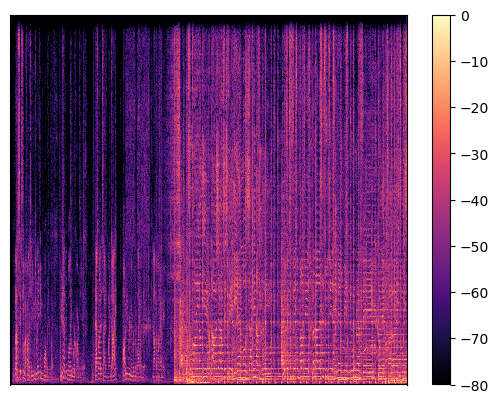

In [32]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

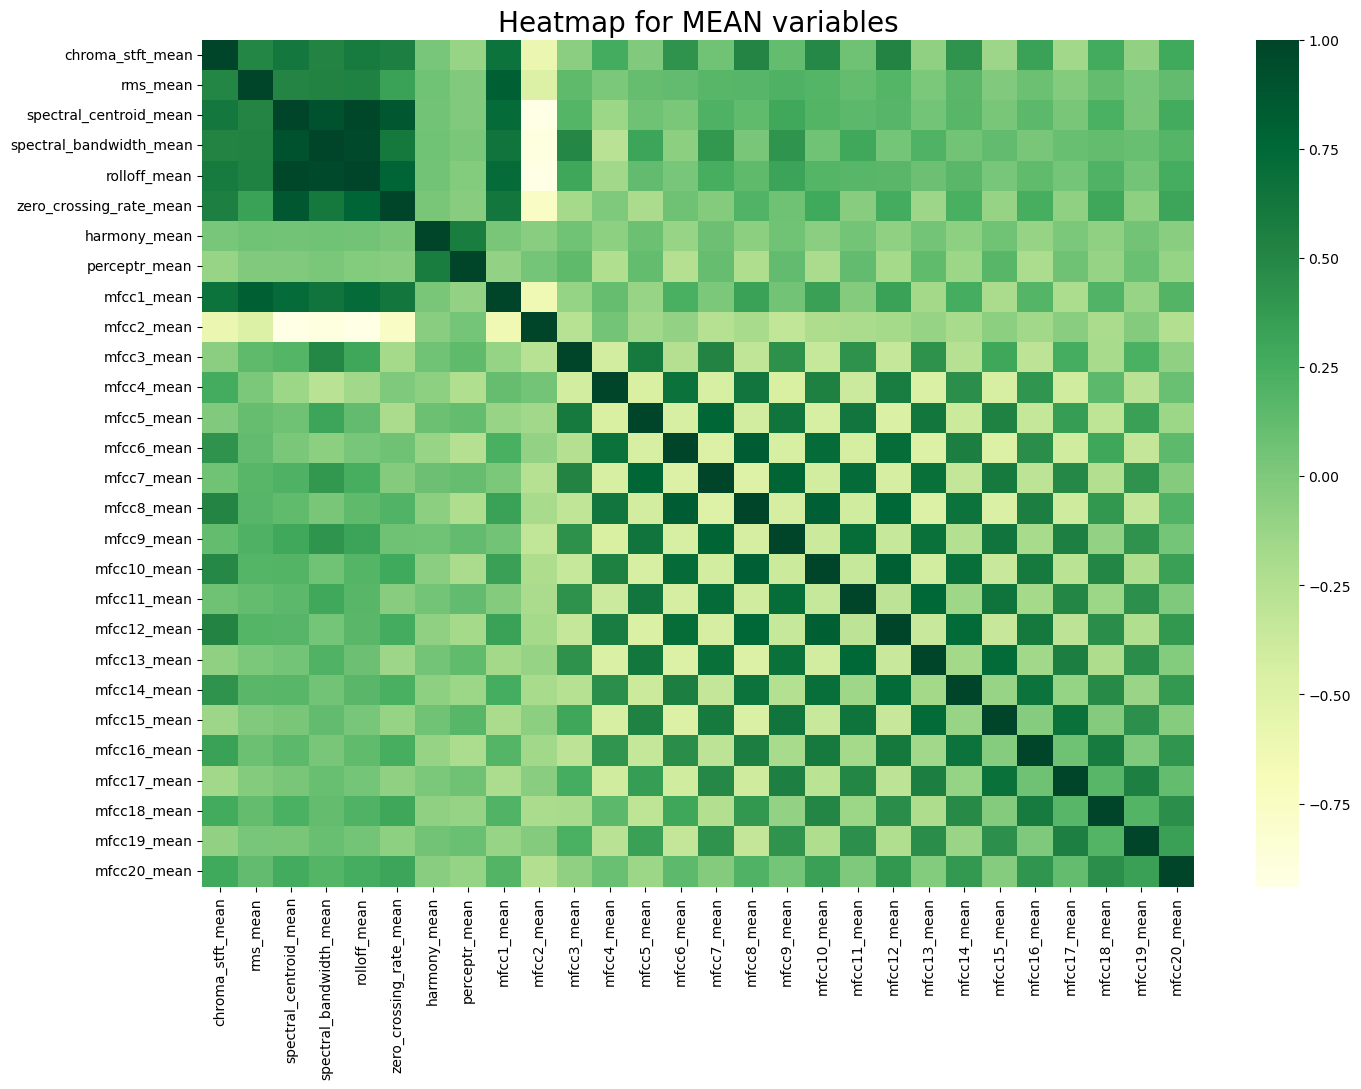

In [33]:
# Computing the Correlation Matrix 
spike_cols = [col for col in music_data.columns if 'mean' in col] 
  
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(16, 11)); 
  
# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn') 
  
plt.title('Heatmap for MEAN variables', fontsize = 20) 
plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10);